In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = sns.load_dataset('iris')
print(df.head())
print(df.describe())
print(df['species'].value_counts())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
species
setosa        50
versicolor    50
virginica     50
Name: count, dtyp

In [ ]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1, virginica=2

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(16, 12),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

In [ ]:
model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {round(acc * 100, 2)}%")


Model Accuracy: 100.0%


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_mat)



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


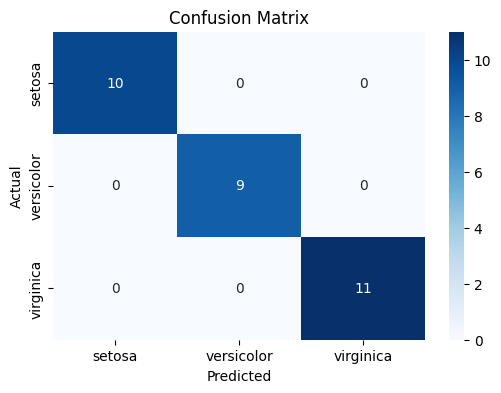

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

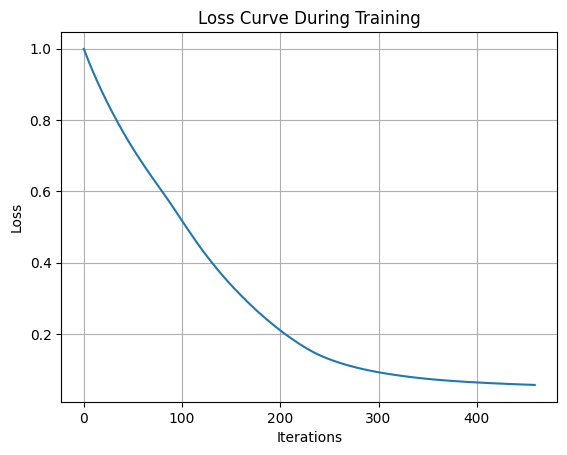

In [ ]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()